## Exercise
1. Import the ```movement.csv``` dataset
2. Visualize as scatter plot of ```z_acc``` and ```y_acc``` and color by the ```move_type```.
3. Try to cluster the data with these features. Try KMeans and DBSCAN. Do you achieve a good clustering? Try out different `eps` values.

### Bonus
4. Use the following code snippet to load the moons dataset:
   
   ```python
    from sklearn.datasets import make_moons
    moons, labels = make_moons(n_samples=300, noise=0.1)
   ```
5. Cluster the moons dataset with DBSCAN and visualize it with two scatter plots in the same row: on the left with the true labels returned by `make_moons`, on the right with the learned labels.

    - Try varying `eps` and `min_samples` and see what happens
    - What happens when you use more noise?

In [94]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/digital-sustainability/SAI3-2025/refs/heads/main/datasets/movement.csv")
df.head()

,t,x_acc,y_acc,z_acc,x_rot,y_rot,z_rot,move_type
0,0.001658,2.603237,-0.068707,9.457633,0.098532,0.079406,-1.539468,1
1,0.011610,1.871558,-0.642763,10.219399,0.128653,-0.004559,-1.495045,1
2,0.021562,1.897454,-0.996478,10.046209,0.142974,-0.081562,-1.505501,1
3,0.031514,2.120041,-0.338596,9.839938,0.115268,-0.088669,-1.557105,1
4,0.041466,2.452201,-0.256117,9.470506,0.050623,-0.083579,-1.636483,1


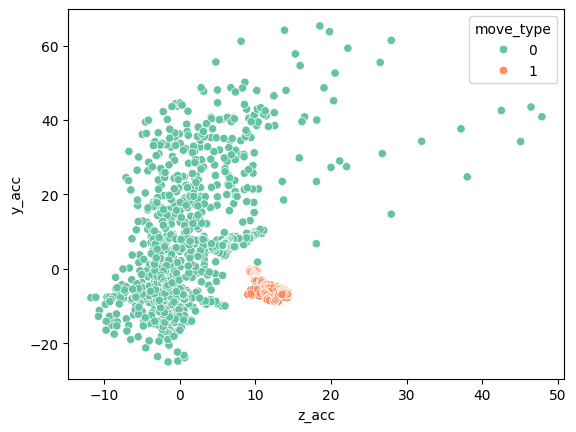

In [95]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(df, x="z_acc", y="y_acc", hue="move_type", palette="Set2");

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[["z_acc", "y_acc"]]
std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

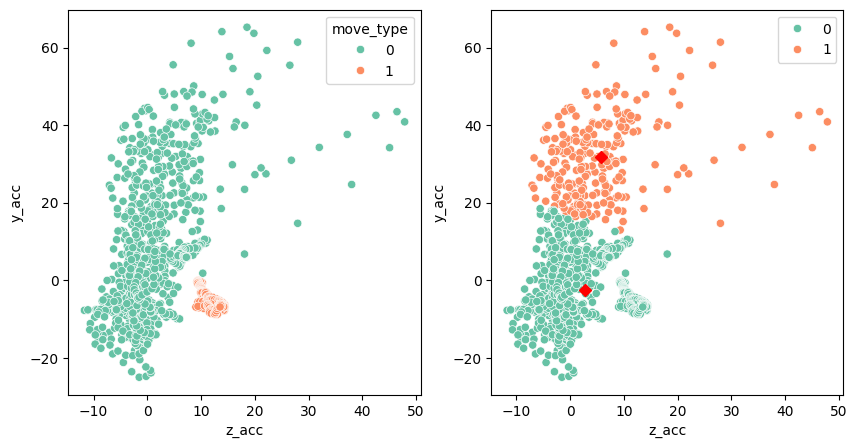

In [99]:
kmeans_model = KMeans(n_clusters=2, random_state=35)
kmeans_model.fit(X=X_scaled)

cluster_centers = std_scaler.inverse_transform(kmeans_model.cluster_centers_)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=df, x='z_acc', y='y_acc', hue='move_type', palette='Set2', ax=ax[0])
sns.scatterplot(data=df, x='z_acc', y='y_acc', hue=kmeans_model.labels_, palette='Set2', ax=ax[1])
plt.plot(cluster_centers[:, 0], cluster_centers[:, 1], 'rD');

We see that K-Means did not discover the two clusters that divide the samples into `move_type` 0 and 1. Let's see if DBSCAN might discover it.

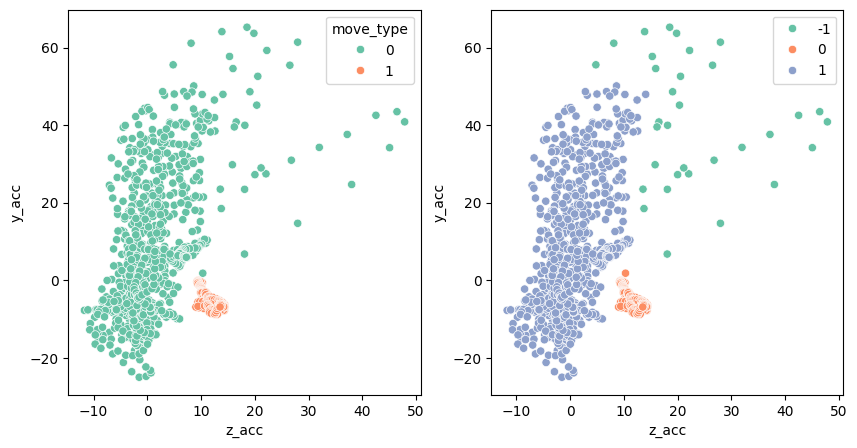

In [102]:
from sklearn.cluster import DBSCAN

db_model = DBSCAN(eps=0.3)
db_model.fit(X=X_scaled)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=df, x='z_acc', y='y_acc', hue='move_type', palette='Set2', ax=ax[0])
sns.scatterplot(data=df, x='z_acc', y='y_acc', hue=db_model.labels_, palette='Set2', ax=ax[1]);

Indeed, DBSCAN was able to discover the two clusters that we expected. The green dots that are labelled with -1 are the outliers. Of course we were lucky to set `eps=0.3` in the instantiation of the DBSCAN model. But to be honest, this was not kust luck. I tried out different values and chose the one that worked best. This is called *hyperparameter optimization* and is done a lot in practice, but usually more systematically.

# Bonus

In the cell below, you can change the parameters `EPS`, `MIN_SAMPLES`, and `NOISE` and then re-run that cell and the cells below to see how it affects the clustering.

In [115]:
# Adding noise to the data
NOISE = 0.1

# DBSCAN parameters
EPS = 0.3
MIN_SAMPLES = 5

In [116]:
from sklearn.datasets import make_moons
moons, labels = make_moons(n_samples=300, noise=NOISE, random_state=42)

moons = pd.DataFrame(moons, columns=['feature1', 'feature2'])
moons['label'] = labels

moons.head(5)

,feature1,feature2,label
0,0.682988,-0.345203,1
1,2.040990,-0.131615,1
2,-0.139752,0.454391,1
3,0.885748,0.286342,0
4,1.182459,-0.497711,1


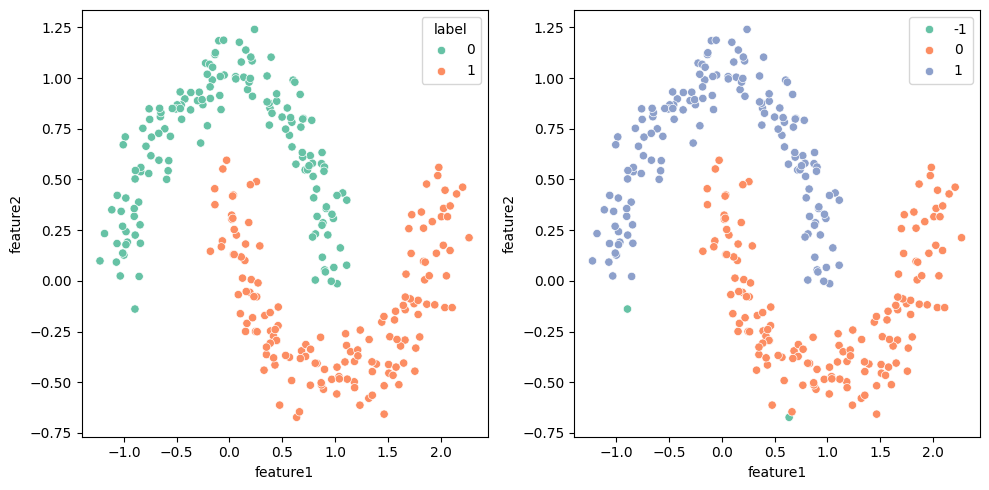

In [117]:
X = moons[['feature1', 'feature2']]

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

db_model = DBSCAN(eps=EPS, min_samples=MIN_SAMPLES)
db_model.fit(X=X_scaled)

fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=moons, x='feature1', y='feature2', hue='label', palette='Set2', ax=ax[0])
sns.scatterplot(data=moons, x='feature1', y='feature2', hue=db_model.labels_, palette='Set2', ax=ax[1])
plt.tight_layout();